# Tracer des champs de vecteurs avec `quiver`

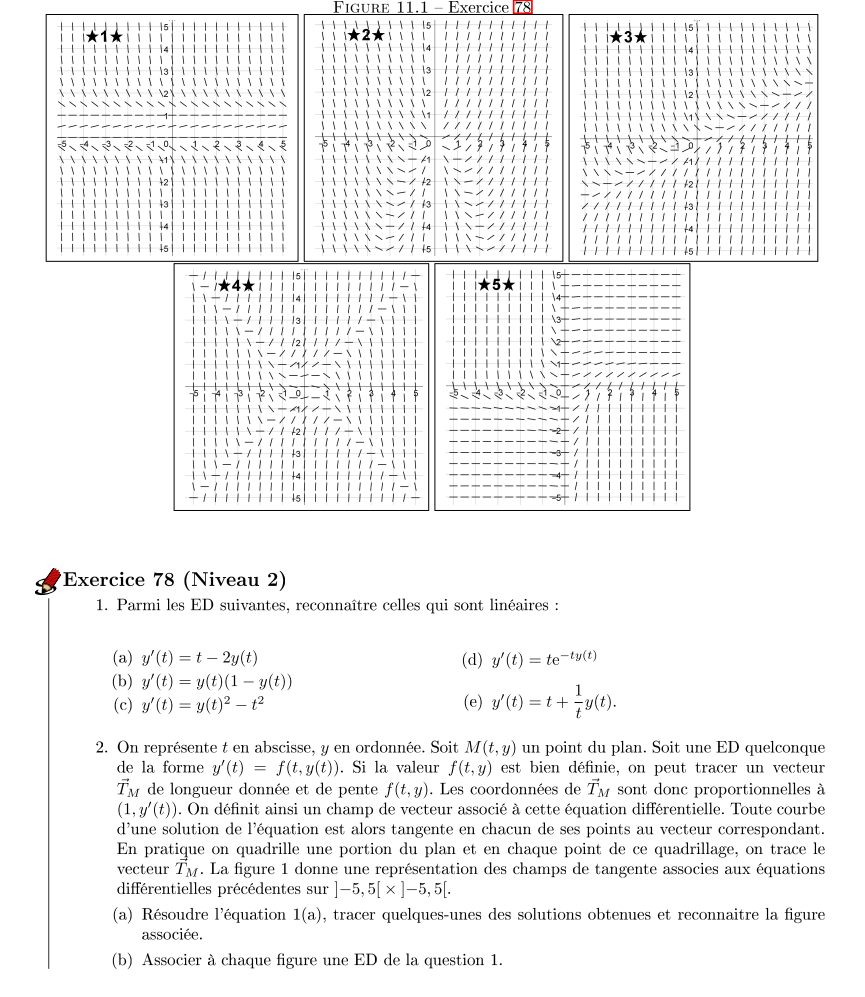

## Mail d’Elsa
> Pour cerner les objectifs : à une équation y'(t) = f(t,y) donnée (exemple : celles ci dessous)
>
>- faire un maillage du plan en (t,y)
>- sur chaque point du maillage, tracer le champ de vecteur 
>
>$F(t,y ) =1 I + y'(t) J = I + f(t,y) J$ 
>
>(I et J représentent les vecteurs unitaires des axes)
>- superposer des courbes obtenues soit en résolvant l'équa diff de manière symbolique (les étudiants résolvent de tete, obtiennent une solution y(t) et la tracent avec matplotlib) ou bien avec la méthode d'Euler point par point vue dans un TP précédent. 
>
>Voilà ! C'est pas pressé. 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

## a) $y'(t) = t - 2y(t)$

### Calcul de la solution avec sympy

In [22]:
f, y = symbols('f y', cls=Function)

In [23]:
t = symbols('t')

In [24]:
eq = Eq(y(t).diff(t),  t -  2*y(t))

eq

Eq(Derivative(y(t), t), t - 2*y(t))

In [25]:
sol = dsolve(eq, y(t)) 

In [26]:
sol

Eq(y(t), C1*exp(-2*t) + t/2 - 1/4)

### Graphe de la solution

In [27]:
y_sol = lambda t, c: c*np.exp(-2*t)+ t/2 - 1/4

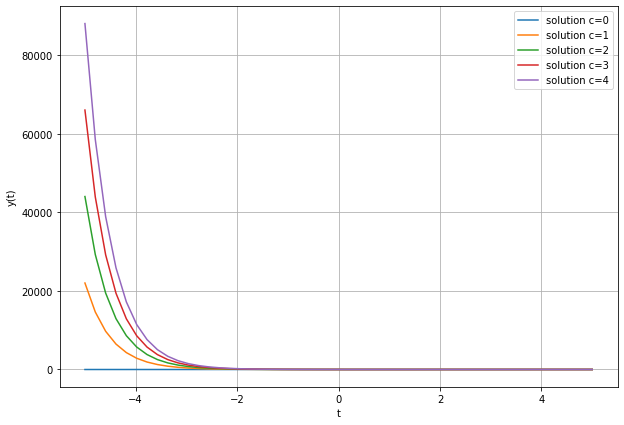

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
t0 = -5
tt = np.linspace(t0, 5)

for c in range(0, 5):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')

ax.legend();


### Graphe du champ de vecteurs avec `quiver`

In [29]:
f = lambda y,t : t - 2*y

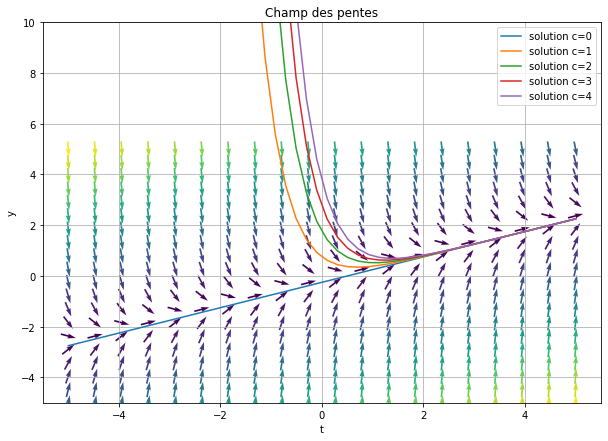

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

# quiverplot
# On définit une grille à partir de 2 espaces linéaires
gh  = np.linspace(-5,5,20)
gv  = np.linspace(-5,5,20)

T,Y = np.meshgrid(gh,gv)        # on crée la grille à partir de nos espaces linéaires (horizontal, vertical)
DT, DY = 1, f(Y,T)            # on calcule le taux de croissance sur la grille
M = np.sqrt(DT**2+DY**2)        # norme de la croissance pour la couleur des flèches
M[ M==0 ] = 1                   # On remplace les éventuels 0 par des 1 pour les divisions qui vont suivre 
ax.quiver(T,Y, DT/M, DY/M, M, pivot='mid') # le graphe des flèches sur la grille

tt = np.linspace(-5, 5)
for c in range(0, 5):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')

ax.set_ylim((-5, 10))
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Champ des pentes')
ax.legend();


## b) $y'(t) = y(t)(1 - y(t))$

### Calcul de la solution avec sympy

In [31]:
f, y = symbols('f y', cls=Function)

t = symbols('t')

eq = Eq(y(t).diff(t), y(t)*(1 - y(t)))
eq

Eq(Derivative(y(t), t), (1 - y(t))*y(t))

In [32]:
sol = dsolve(eq)

In [33]:
sol

Eq(y(t), 1/(C1*exp(-t) + 1))

### Graphe de la solution

In [34]:
y_sol = lambda t, c: 1/(c*np.exp(-t) + 1)

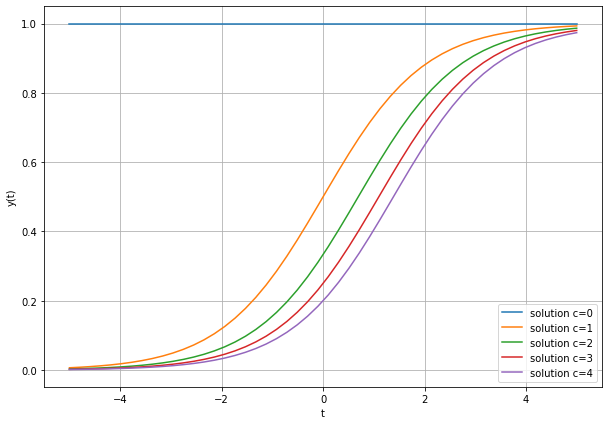

In [35]:
fig, ax = plt.subplots(figsize=(10,7))
t0 = -5
tt = np.linspace(t0, 5)

for c in range(0, 5):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')
    
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend();


### Graphe du champ de vecteurs avec `quiver`

In [36]:
f = lambda y,t : y*(1-y)

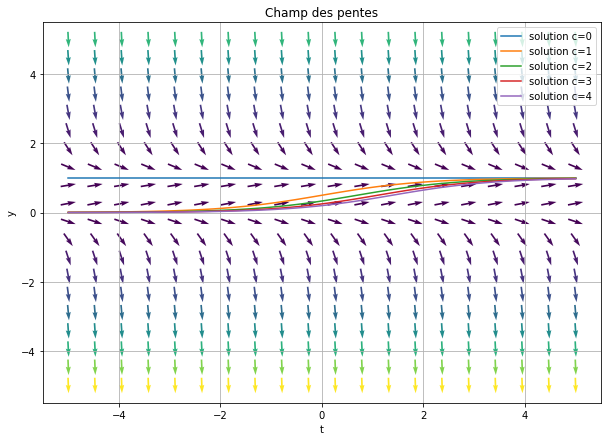

In [37]:
fig, ax = plt.subplots(figsize=(10,7))

# quiverplot
# On définit une grille à partir de 2 espaces linéaires
gh  = np.linspace(-5,5,20)
gv  = np.linspace(-5,5,20)

T,Y = np.meshgrid(gh,gv)        # on crée la grille à partir de nos espaces linéaires (horizontal, vertical)
DT, DY = 1, f(Y,T)            # on calcule le taux de croissance sur la grille
M = np.sqrt(DT**2+DY**2)        # norme de la croissance pour la couleur des flèches
M[ M==0 ] = 1                   # On remplace les éventuels 0 par des 1 pour les divisions qui vont suivre 
ax.quiver(T,Y, DT/M, DY/M, M, pivot='mid') # le graphe des flèches sur la grille

tt = np.linspace(-5, 5)
for c in range(0, 5):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')


ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Champ des pentes')
ax.legend();


## c) $y'(t) = y(t)^2 - t^2$

### Calcul de la solution avec sympy

In [38]:
f, y = symbols('f y', cls=Function)

In [39]:
t = symbols('t')

In [40]:
eq = Eq(y(t).diff(t),  y(t)**2 - t**2)

eq

Eq(Derivative(y(t), t), -t**2 + y(t)**2)

In [41]:
dsolve(eq)

TypeError: bad operand type for unary -: 'list'

Ça ne marche pas, autre méthode

In [42]:
from scipy.integrate import odeint

In [43]:
f = lambda y, t: y**2 - t**2
t0  = -5
y0  = 0
tt  = np.linspace(t0,5,201)
sol = odeint(f,y0,tt)

### Graphe d’une solution

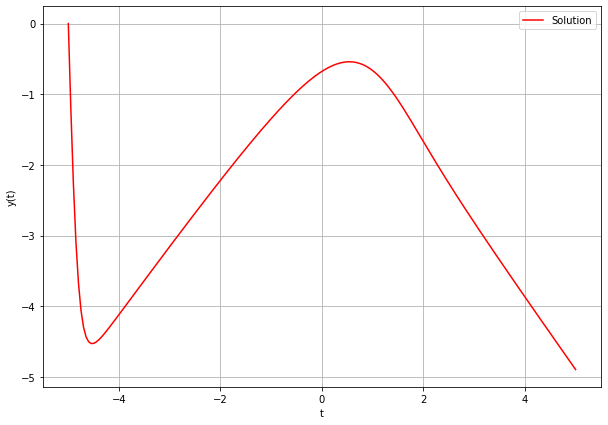

In [44]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tt, sol, c='r', label='Solution')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend();


### Graphe du champ de vecteurs avec `quiver`

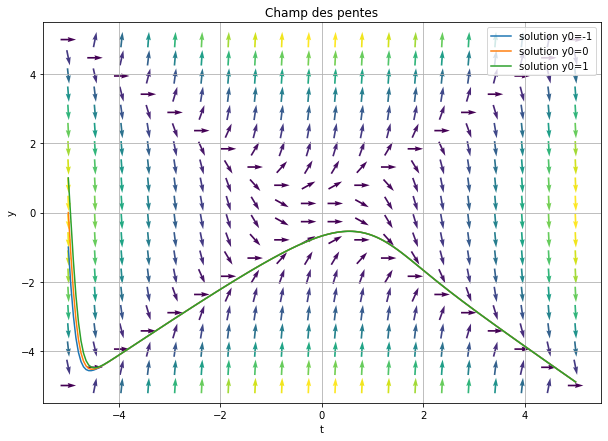

In [47]:
fig, ax = plt.subplots(figsize=(10,7))

# quiverplot
# On définit une grille à partir de 2 espaces linéaires
gh  = np.linspace(-5,5,20)
gv  = np.linspace(-5,5,20)

T,Y = np.meshgrid(gh,gv)        # on crée la grille à partir de nos espaces linéaires (horizontal, vertical)
DT, DY = 1, f(Y,T)            # on calcule le taux de croissance sur la grille
M = np.sqrt(DT**2+DY**2)        # norme de la croissance pour la couleur des flèches
M[ M==0 ] = 1                   # On remplace les éventuels 0 par des 1 pour les divisions qui vont suivre 
ax.quiver(T,Y, DT/M, DY/M, M, pivot='mid') # le graphe des flèches sur la grille

for y0 in range(-1, 2):
    sol = odeint(f,y0,tt)
    ax.plot(tt, sol, label=f'solution {y0=}')
    
    

ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Champ des pentes')
ax.legend();


## d) $y'(t) = te^{-ty(t)}$

### Calcul de la solution avec sympy

In [48]:
f, y = symbols('f y', cls=Function)

t = symbols('t')

eq = Eq(y(t).diff(t), t*exp(-t*y(t)))
eq

Eq(Derivative(y(t), t), t*exp(-t*y(t)))

In [49]:
sol = dsolve(eq)

NotImplementedError: The given ODE -t*exp(-t*y(t)) + Derivative(y(t), t) cannot be solved by the lie group method

Ça ne marche pas, autre méthode

In [50]:
from scipy.integrate import odeint

In [51]:
f = lambda y, t: t*np.exp(-t*y)
t0  = -5
y0  = 0
tt  = np.linspace(t0,5,201)
sol = odeint(f,y0,tt)

### Graphe d’une solution

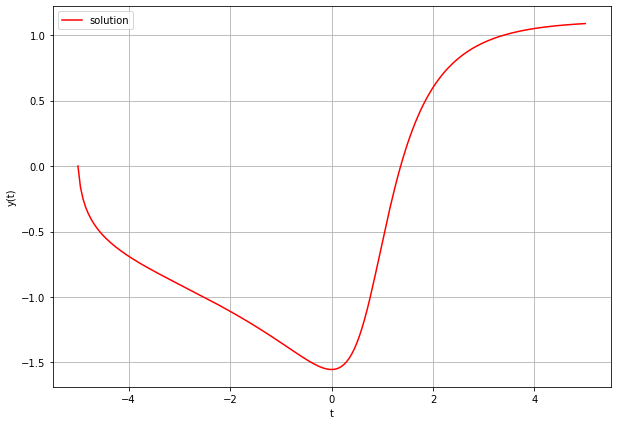

In [52]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(tt, sol, c='r', label='solution')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend();


### Graphe du champ de vecteurs avec `quiver`

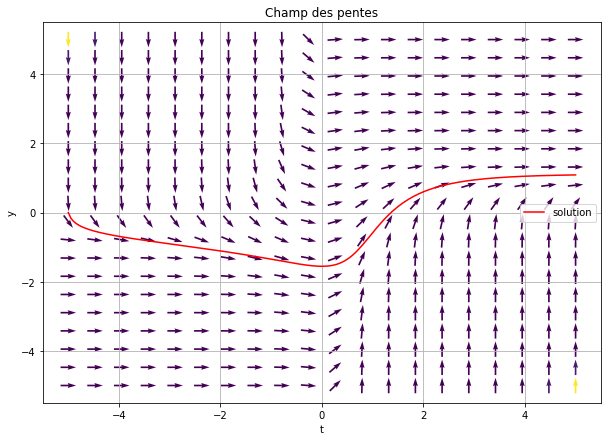

In [53]:
fig, ax = plt.subplots(figsize=(10,7))

# quiverplot
# On définit une grille à partir de 2 espaces linéaires
gh  = np.linspace(-5,5,20)
gv  = np.linspace(-5,5,20)

T,Y = np.meshgrid(gh,gv)        # on crée la grille à partir de nos espaces linéaires (horizontal, vertical)
DT, DY = 1, f(Y,T)            # on calcule le taux de croissance sur la grille
M = np.sqrt(DT**2+DY**2)        # norme de la croissance pour la couleur des flèches
M[ M==0 ] = 1                   # On remplace les éventuels 0 par des 1 pour les divisions qui vont suivre 
ax.quiver(T,Y, DT/M, DY/M, M, pivot='mid') # le graphe des flèches sur la grille


ax.plot(tt, sol, c='r', label='solution')

ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Champ des pentes')
ax.legend();


## e) $y'(t) = t + \frac{1}{t} y(t)$

### Calcul de la solution avec sympy

In [54]:
f, y = symbols('f y', cls=Function)

t = symbols('t')

eq = Eq(y(t).diff(t), t + (1/t)* y(t))
eq

Eq(Derivative(y(t), t), t + y(t)/t)

In [55]:
sol = dsolve(eq)

In [56]:
sol

Eq(y(t), t*(C1 + t))

### Graphe de quelques solutions

In [59]:
y_sol = lambda t, c: t*(c+ t)

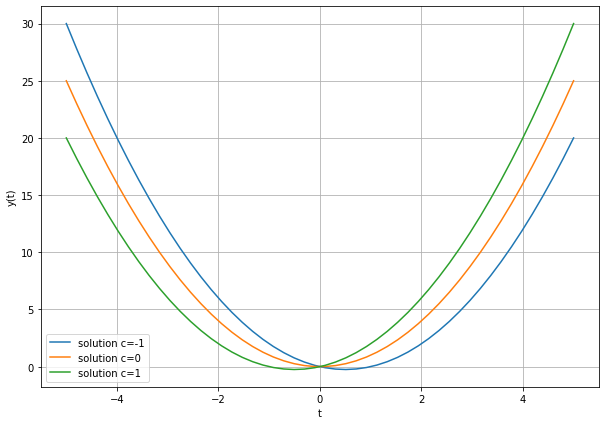

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
t0 = -5
tt = np.linspace(t0, 5)
for c in range(-1, 2):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend();


### Graphe du champ de vecteurs avec `quiver`

In [61]:
f = lambda y,t : t + y/t

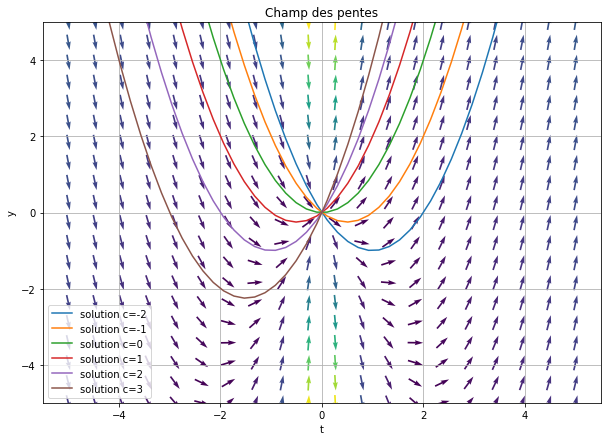

In [62]:
fig, ax = plt.subplots(figsize=(10,7))

# quiverplot
# On définit une grille à partir de 2 espaces linéaires
gh  = np.linspace(-5,5,20)
gv  = np.linspace(-5,5,20)

T,Y = np.meshgrid(gh,gv)        # on crée la grille à partir de nos espaces linéaires (horizontal, vertical)
DT, DY = 1, f(Y,T)            # on calcule le taux de croissance sur la grille
M = np.sqrt(DT**2+DY**2)        # norme de la croissance pour la couleur des flèches
M[ M==0 ] = 1                   # On remplace les éventuels 0 par des 1 pour les divisions qui vont suivre 
ax.quiver(T,Y, DT/M, DY/M, M, pivot='mid') # le graphe des flèches sur la grille

tt = np.linspace(-5, 5)
for c in range(-2, 4):
    ax.plot(tt, y_sol(tt, c), label=f'solution {c=}')
    

limit = (-5, 5)
ax.set_ylim(limit)

ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Champ des pentes')
ax.legend();
